In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.shape

(10000, 14)

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### Data Exploration

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


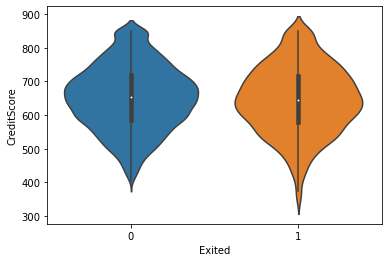

In [7]:
sns.violinplot(x='Exited',y="CreditScore",data=df)

In [8]:
# sns.swarmplot(x='Exited',y="Balance",data=df)

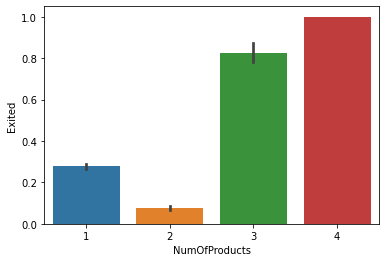

In [9]:
sns.barplot(x='NumOfProducts',y="Exited",data=df)

In [10]:
temp = ["<30" if i<30 else "<40" if i<40 else "<50" if i<50 else "<60" for i in df["Age"]]
k = pd.DataFrame(temp)
k[0].value_counts()
df["age_bucket"] = k[0]

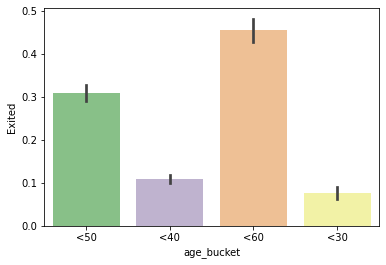

In [11]:
sns.barplot(x="age_bucket",y="Exited",data=df,palette = "Accent")

In [12]:
del df["age_bucket"]

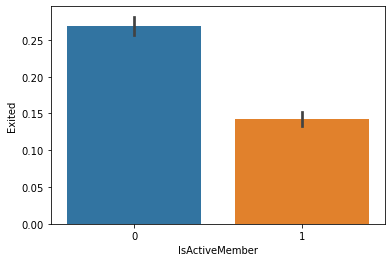

In [13]:
sns.barplot(x='IsActiveMember',y="Exited",data=df)

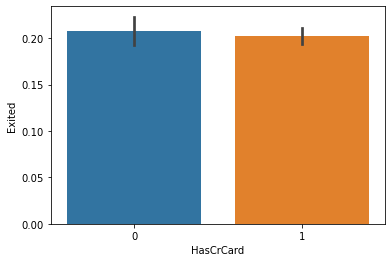

In [14]:
sns.barplot(x='HasCrCard',y="Exited",data=df)

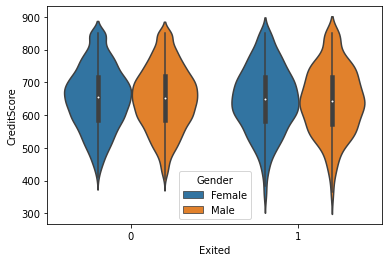

In [15]:
sns.violinplot(x='Exited',y="CreditScore",hue = "Gender",data=df)

### Model Building

In [16]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [17]:
X = df.drop(["Exited"],axis=1)

In [18]:
y = df["Exited"]

In [19]:
gender = pd.get_dummies(X['Gender'] , drop_first= True)
geography = pd.get_dummies(X['Geography'] , drop_first= True)

In [20]:
X = pd.concat([X, gender], axis = 1)
X.drop(['Gender'],axis=1,inplace=True)
X.drop(['Geography'],axis=1,inplace=True)

In [21]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male
0,619,42,2,0.00,1,1,1,101348.88,0
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,0
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 101)

In [23]:
X_train.shape

(7000, 9)

In [24]:
X_test.shape

(3000, 9)

In [25]:
sc = preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)  # to use the same mean and std for normalization

In [26]:
model = LogisticRegression()
model.fit(X_train, y_train.astype(int))


LogisticRegression()

### Performance Metrics

In [27]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2378
           1       0.59      0.17      0.26       622

    accuracy                           0.80      3000
   macro avg       0.70      0.57      0.57      3000
weighted avg       0.77      0.80      0.76      3000



In [28]:
print(confusion_matrix(y_test,y_pred))

[[2305   73]
 [ 518  104]]


In [29]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

In [30]:
accuracy_score(y_test, y_pred)

0.803